In [1]:
#!pip install folium 
#conda install -c conda-forge folium
#!pip install ipyleaflet
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import string
import ipyleaflet
from ipyleaflet import Map, basemaps, basemap_to_tiles, Marker, Circle, DrawControl
from datetime import datetime
from dateutil.parser import parse
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import folium
import folium.plugins as plugins
from folium.plugins import MarkerCluster
from prophet import Prophet
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.simplefilter("ignore")

     ---------------------------------------- 3.4/3.4 MB 12.0 MB/s eta 0:00:00
     ---------------------------------------- 56.5/56.5 kB ? eta 0:00:00


### Загружаем данные за период с апреля 2018 года по июнь 2018 года

In [2]:
df_2018 = pd.read_csv("Datafiniti_Fast_Food_Restaurants.csv")
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  object 
 1   dateAdded    10000 non-null  object 
 2   dateUpdated  10000 non-null  object 
 3   address      10000 non-null  object 
 4   categories   10000 non-null  object 
 5   city         10000 non-null  object 
 6   country      10000 non-null  object 
 7   keys         10000 non-null  object 
 8   latitude     10000 non-null  float64
 9   longitude    10000 non-null  float64
 10  name         10000 non-null  object 
 11  postalCode   10000 non-null  object 
 12  province     10000 non-null  object 
 13  sourceURLs   10000 non-null  object 
 14  websites     10000 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


### Загружаем данные за период с декабря 2018 года по май 2019 года

In [3]:
df_2019 = pd.read_csv("Datafiniti_Fast_Food_Restaurants_May19.csv")
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   dateAdded          10000 non-null  object 
 2   dateUpdated        10000 non-null  object 
 3   address            10000 non-null  object 
 4   categories         10000 non-null  object 
 5   primaryCategories  10000 non-null  object 
 6   city               10000 non-null  object 
 7   country            10000 non-null  object 
 8   keys               10000 non-null  object 
 9   latitude           10000 non-null  float64
 10  longitude          10000 non-null  float64
 11  name               10000 non-null  object 
 12  postalCode         10000 non-null  object 
 13  province           10000 non-null  object 
 14  sourceURLs         10000 non-null  object 
 15  websites           9918 non-null   object 
dtypes: float64(2), object(1

### Объединяем данные в один dataframe

In [4]:
new_df = pd.concat([df_2018, df_2019])
new_df.head(10)

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites,primaryCategories
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...,NaN
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...,NaN
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco...",NaN
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c...",NaN
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...,NaN
5,AVwc57jLkufWRAb50ROs,2015-10-23T23:59:49Z,2018-06-26T02:59:43Z,9768 Grand River Ave,Fast Food Restaurant,Detroit,US,us/mi/detroit/9768grandriverave/-791445730,42.368823,-83.138251,Wendy's,48204,MI,https://foursquare.com/v/wendys/4bfec191e584c9...,http://www.wendys.com,NaN
6,AVwc81QgkufWRAb50vnI,2015-09-21T07:47:08Z,2018-06-26T02:59:43Z,13600 W McNichols Rd,Fast Food Restaurant,Detroit,US,us/mi/detroit/13600wmcnicholsrd/-2061630068,42.416819,-83.180444,Burger King,48235,MI,https://foursquare.com/v/burger-king/4bab7981f...,"http://bk.com,http://www.bk.com",NaN
7,AVwdVafPByjofQCxoA6y,2016-06-06T16:15:08Z,2018-06-26T02:59:41Z,4111 Oceanside Blvd,Fast Food,Oceanside,US,us/ca/oceanside/4111oceansideblvd/1143321601,33.205722,-117.288645,Chipotle Mexican Grill,92056,CA,https://www.trip.com/oceanside-ca/restaurants/...,"http://www.chipotle.com,http://www.lasalsa.com",NaN
8,AVwc4JQKIN2L1WUfp3hU,2016-12-13T12:34:52Z,2018-06-26T02:59:32Z,162 Old Country Rd,Fast Food Restaurants,Riverhead,US,us/ny/riverhead/162oldcountryrd/267504952,40.937359,-72.650142,7-Eleven,11901,NY,http://www.local.com/business/details/yx/river...,"http://www.7-eleven.com/?yext=39326,http://www...",NaN
9,AVwdhkOGByjofQCxp9qV,2016-04-16T16:20:41Z,2018-06-25T12:05:40Z,1407 S Stockton Ave,Fast Food Restaurant,Monahans,US,us/tx/monahans/1407sstocktonave/-1721138121,31.580721,-102.891455,Dairy Queen,79756,TX,https://foursquare.com/v/dairy-queen/4bd4fd7b6...,"http://www.dairyqueen.com,http://api.citygridm...",NaN


In [5]:
new_df.isnull().sum()

id                       0
dateAdded                0
dateUpdated              0
address                  0
categories               0
city                     0
country                  0
keys                     0
latitude                 0
longitude                0
name                     0
postalCode               0
province                 0
sourceURLs               0
websites                82
primaryCategories    10000
dtype: int64

### Удаляем дубликаты

In [6]:
new_df[new_df.duplicated(subset=["keys", "id", "dateUpdated", "dateAdded", "address"])]

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites,primaryCategories
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...,NaN
31,AVwcqXk_IN2L1WUfnfjj,2016-03-21T01:37:59Z,2018-06-25T09:29:41Z,105 Jericho Tpke,Fast Food,Jericho,US,us/ny/jericho/105jerichotpke/-1161002137,40.780233,-73.559340,McDonald's,11753,NY,https://www.allmenus.com/ny/jericho/188791-mcd...,http://api.citygridmedia.com/content/places/v2...,NaN
51,AVwdDlQLIN2L1WUfrwVm,2015-12-02T19:41:17Z,2018-06-25T09:29:33Z,59 W Main St,Fast Food,Spencer,US,us/ma/spencer/59wmainst/-1161002137,42.233410,-72.012516,McDonald's,01562,MA,https://www.tripadvisor.com/Restaurant_Review-...,"http://mcdonalds.com,http://www.mcdonalds.com/...",NaN
72,AVzX86OvLD2H7whiWxXf,2017-06-24T02:34:47Z,2018-06-25T09:00:55Z,706 Fletcher Pkwy,Fast Food Restaurant,El Cajon,US,us/ca/elcajon/706fletcherpkwy/-230200247,32.808270,-116.971370,Boston Market,92020,CA,https://foursquare.com/v/boston-market/4b788d7...,"http://www.bostonmarket.com,https://bostonmark...",NaN
82,AVwc7rRD_7pvs4fz0gYD,2016-06-05T20:57:34Z,2018-06-25T09:00:32Z,7011 Barker Cypress Rd,Fast Food Restaurant and Burger Joint,Cypress,US,us/tx/cypress/7011barkercypressrd/-2061630068,29.880810,-95.683922,Burger King,77433,TX,http://www.yellowbook.com/profile/burger-king_...,http://www.bk.com,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9899,AVwczQ7J_7pvs4fzzG6F,2015-11-09T18:20:26Z,2018-04-08T05:59:55Z,9515 Candelaria Rd NE,Fast Food Restaurants,Albuquerque,US,us/nm/albuquerque/9515candelariardne/-1161002137,35.116500,-106.534030,McDonalds,87112,NM,https://foursquare.com/v/mcdonalds/4c7fa8b701d...,"http://mcdonalds.com,http://www.mcdonalds.com/...",NaN
9929,AVwc74gg_7pvs4fz0icM,2016-03-23T03:19:54Z,2018-04-07T23:46:22Z,4117 N Josey Ln,Fried Chicken Joint and Fast Food Restaurant,Carrollton,US,us/tx/carrollton/4117njoseyln/106088,33.023748,-96.885564,KFC,75007,TX,https://foursquare.com/v/kfc/4c48dabf6594be9af...,http://www.kfc.com,NaN
9938,AVwd6JqQByjofQCxtkJn,2015-11-07T12:47:09Z,2018-04-07T23:45:16Z,28670 Northwestern Hwy,Fast Food Restaurant,Southfield,US,us/mi/southfield/28670northwesternhwy/-1161002137,42.499260,-83.303460,McDonald's,48034,MI,https://foursquare.com/v/mcdonalds/4d2de15daa5...,"http://mcdonalds.com,http://www.mcdonalds.com",NaN
9940,AVwdjrnuByjofQCxqSG_,2015-11-06T09:52:33Z,2018-04-07T23:45:11Z,205 Back River Neck Rd,Fast Food,Essex,US,us/md/essex/205backriverneckrd/-1161002137,39.307620,-76.443300,McDonald's,21221,MD,https://foursquare.com/v/mcdonalds/4c0a763f340...,"http://mcdonalds.com,http://www.mcdonalds.com/...",NaN


In [7]:
new_df.drop_duplicates(subset=["keys", "id", "dateUpdated", "dateAdded", "address"], inplace = True)

### Воспользуемся скриптом, который переименует похожие имена в одно основное имя

In [8]:
import nltk
restaurant_names = new_df['name'].unique()

most_similar = []
for i in range(len(restaurant_names)):
    temp_similar = [restaurant_names[i]]
    
    for j in range(len(restaurant_names)):
        if restaurant_names[i] == restaurant_names[j]:
            continue
        if nltk.edit_distance(restaurant_names[i].lower(), restaurant_names[j].lower()) < 3:
            temp_similar.append(restaurant_names[j])
            
    if len(temp_similar) > 1:
        most_similar.append(temp_similar)
    if i > 0 and i % 10 == 0:
        print("index", i-10, "-", i, "checking finished| most similar size:", len(most_similar))
print("similarity checking finished")

most_similar_word_count = 0
for i in most_similar:
    most_similar_word_count += len(i)
print("size of the most similar list:", most_similar_word_count)

index 0 - 10 checking finished| most similar size: 7
index 10 - 20 checking finished| most similar size: 11
index 20 - 30 checking finished| most similar size: 14
index 30 - 40 checking finished| most similar size: 20
index 40 - 50 checking finished| most similar size: 24
index 50 - 60 checking finished| most similar size: 26
index 60 - 70 checking finished| most similar size: 29
index 70 - 80 checking finished| most similar size: 35
index 80 - 90 checking finished| most similar size: 40
index 90 - 100 checking finished| most similar size: 42
index 100 - 110 checking finished| most similar size: 46
index 110 - 120 checking finished| most similar size: 50
index 120 - 130 checking finished| most similar size: 56
index 130 - 140 checking finished| most similar size: 60
index 140 - 150 checking finished| most similar size: 64
index 150 - 160 checking finished| most similar size: 68
index 160 - 170 checking finished| most similar size: 70
index 170 - 180 checking finished| most similar size

index 1410 - 1420 checking finished| most similar size: 292
index 1420 - 1430 checking finished| most similar size: 296
index 1430 - 1440 checking finished| most similar size: 299
index 1440 - 1450 checking finished| most similar size: 301
index 1450 - 1460 checking finished| most similar size: 303
index 1460 - 1470 checking finished| most similar size: 305
index 1470 - 1480 checking finished| most similar size: 305
index 1480 - 1490 checking finished| most similar size: 307
index 1490 - 1500 checking finished| most similar size: 307
index 1500 - 1510 checking finished| most similar size: 309
index 1510 - 1520 checking finished| most similar size: 310
index 1520 - 1530 checking finished| most similar size: 313
index 1530 - 1540 checking finished| most similar size: 314
index 1540 - 1550 checking finished| most similar size: 317
index 1550 - 1560 checking finished| most similar size: 319
index 1560 - 1570 checking finished| most similar size: 320
index 1570 - 1580 checking finished| mos

In [9]:
most_similar_final = [
 ['AW Restaurant', 'AW Restaurants', 'Aw Restaurants', 'A W Restaurant', 'AWRestaurants'],
 ["Albee's NY Gyros", "Albee's Ny Gyros"],
 ["Arby's", 'Arbys'],
 ['BLIMPIE', 'Blimpie'],
 ['Back Yard Burgers', 'Backyard Burgers'],
 ["Bad Daddy's Burger Bar", 'Bad Daddys Burger Bar'],
 ['Baskin Robbins', 'BaskinRobbins', 'Baskin-Robbins'],
 ['Best Burgers', 'Best Burger'],
 ["Big Billy's Burger Joint", 'Big Billys Burger Joint'],
 ['Big Boy', 'Big Boys'],
 ["Blake's Lotaburger", 'Blakes Lotaburger'],
 ['Blimpie', 'BLIMPIE'],
 ["Bob's Burger Brew",
  "Bob's Burgers Brew"],
 ['Bojangles Famous Chicken n Biscuits',
  "Bojangles' Famous Chicken 'n Biscuits"],
 ['Burger King', 'Burger King®'],
 ['Burger Master', 'Burgermaster'],
 ['BurgerFi', 'Burgerfi'],
 ['Burgermaster', 'Burger Master'],
 ['Burrito Amigos', 'Burrtio Amigos'],
 ['C & J Drive In', 'C J Drive In'],
 ["CULVER'S", "Culver's", 'Culvers'],
 ["Captain D'S", 'Captain Ds'],
 ["Carl's Jr", "Carl's Jr.", 'Carls Jr'],
 ["Chan's Restaurant", "Chen's Restaurant"],
 ['Chanellos Pizza', 'Chanello’s Pizza'],
 ["Charley's Grill & Spirits", "Charley's Grill Spirits"],
 ["Charley's Grilled Subs", 'Charleys Grilled Subs'],
 ["Chen's Restaurant", "Chan's Restaurant"],
 ['Chick-Fil-A', 'Chick-fil-A', 'ChickfilA'],
 ['China Sea', 'China Star', 'China Bear'],
 ["Church's Chicken", 'Churchs Chicken'],
 ["Cisco's Taqueria", 'Ciscos Taqueria'],
 ['Cook Out', 'Cook-Out', 'CookOut'],
 ["Culver's", "CULVER'S", 'Culvers'],
 ['Dairy Queen', 'Dairy queen'],
 ['Dairy Queen Grill & Chill', 'Dairy Queen Grill Chill'],
 ["Dominic's of New York", 'Dominics of New York'],
 ["Domino's Pizza", 'Dominos Pizza'],
 ['Dunkin Donuts', "Dunkin' Donuts"],
 ['Einstein Bros Bagels', 'Einstein Bros. Bagels'],
 ['Emidio & Sons Italian Restaurant', 'Emidio Sons Italian Restaurant'],
 ["Famous Dave's", 'Famous Daves'],
 ["Farlow's On The Water", 'Farlows on the Water'],
 ["Fazoli's", 'Fazolis'],
 ['Fireplace Restaurant & Lounge', 'Fireplace Restaurant Lounge'],
 ['Five Guys Burgers & Fries', 'Five Guys Burgers Fries'],
 ["Fox's Pizza Den", 'Foxs Pizza Den'],
 ["Freddy's Frozen Custard & Steakburgers",
  'Freddys Frozen Custard Steakburgers',
  "Freddy's Frozen Custard Steakburgers"],
 ["Frisch's Big Boy Restaurant",
  "1 Frisch's Big Boy Restaurant",
  "40 Frisch's Big Boy Restaurant",
  "1 Frisch's Big Boy Restaurant",
  "90 Frisch's Big Boy Restaurant"],
 ['Full Moon Bar B Que', 'Full Moon Bar-B-Que'],
 ["George's Gyros Spot", "George's Gyros Spot 2"],
 ['Grub Burger Bar', 'Bru Burger Bar'],
 ["Guthrie's", 'Guthries'],
 ['Gyro Express', 'Gyro X-Press'],
 ['Gyro Spot', 'Gyro Stop'],
 ["Hardee's", 'Hardees'],
 ["Hardee's Restaurant", "Hardee's Restaurants"],
 ["Hardee's/Red Burrito", "Hardee's/red Burrito", 'Hardees Red Burrito'],
 ['HomeTown Buffet', 'Hometown Buffet'],
 ['Hooters', 'Roosters'],
 ['Hot Dog On A Stick', 'Hot Dog on a Stick'],
 ['In-N-Out Burger', 'InNOut Burger'],
 ["Jack's", 'Jacks'],
 ["Jack's Hamburgers", "Zack's Hamburgers"],
 ["Jason's Deli", 'Jasons Deli'],
 ["Jersey Mike's Subs", 'Jersey Mikes Subs'],
 ["Jimmy John's", 'Jimmy Johns'],
 ['KFC', 'Kfc', 'KFC Kentucky Fried Chicken', 'KFC - Kentucky Fried Chicken'],
 ['Killer Burger', 'Killer Burgers'],
 ['L & L Hawaiian Barbecue', 'L L Hawaiian Barbecue',
  'LL Hawaiian Barbecue'],
 ["Long John Silver's", 'Long John Silvers'],
 ['Mai Tai Restaurant', 'Mai-Tai Restaurant'],
 ["Mary's Pizza Shack", 'Marys Pizza Shack'],
 ["Mc Donald's", "McDonald's", 'Mcdonalds', 'McDonalds'],
 ["McAlister's Deli", "Mcalister's Deli", 'McAlisters Deli'],
 ["Moe's Southwest Grill", 'Moes Southwest Grill'],
 ['Mr Hero', 'Mr. Hero'],
 ['Nicholas Restaurant', "Nicholas' Restaurant"],
 ["Papa John's Pizza", 'Papa Johns Pizza'],
 ['Peking Chinese Restaurant', 'Peking Chinese Restaurants'],
 ["Pietro's Pizza & Gallery of Games", "Pietro's Pizza Gallery of Games"],
 ["Popeye's Louisiana Kitchen", 'Popeyes Louisiana Kitchen'],
 ['Pot Belly Sandwich Works', 'Potbelly Sandwich Works'],
 ['QDOBA Mexican Eats', 'Qdoba Mexican Eats'],
 ['RUNZA', 'Runza'],
 ["Raising Cane's Chicken Fingers", 'Raising Canes Chicken Fingers'],
 ["Rally's", 'Rallys'],
 ["Rally's Hamburgers", 'Rallys Hamburgers'],
 ["Rick's on the River", 'Ricks on the River'],
 ["Ritter's Frozen Custard", 'Ritters Frozen Custard'],
 ["Rockne's", 'Rocknes'],
 ['Roosters', 'Hooters'],
 ['Runza', 'RUNZA'],
 ["Ryan's", 'Ryans'],
 ['SONIC Drive In',
  'Sonic Drive-In',
  'SONIC Drive-In',
  'Sonic DriveIn',
  'Sonic Drive-in'],
 ["STEAK 'N SHAKE",
  "Steak 'n Shake",
  'Steak N Shake',
  'Steak n Shake',
  "Steak 'N Shake"],
 ['SUBWAY', 'Subway'],
 ["Sara's Too", 'Saras Too'],
 ["Simple Simon's Pizza", 'Simple Simons Pizza'],
 ['Slice Of Life', 'Slice of Life'],
 ["Stanfield's Steakhouse", 'Stanfields Steak House'],
 ['T & L Hotdogs', 'T & L Hot Dogs'],
 ['Taco CASA', 'Taco Casa'],
 ['Taco Del Mar', 'Taco del Mar'],
 ["Taco John's", 'Taco Johns'],
 ['Taco Time', 'TacoTime'],
 ['Taste Of Buffalo Pizzeria', 'Taste of Buffalo Pizzeria'],
 ['Tom Drive-in', "Tom's Drive-In"],
 ["Topper's Pizza", 'Toppers Pizza'],
 ['WG Grinders', 'Wg Grinders'],
 ["Wendy's", 'Wendys'],
 ['Wg Grinders', 'WG Grinders'],
 ['Wing Street', 'Wingstreet'],
 ['Z-Pizza', 'zpizza'],
 ["Zack's Hamburgers", "Jack's Hamburgers"]]

In [10]:
match_name_dict = {}
for row in most_similar_final:
    for similar_word in row:
        match_name_dict[similar_word] = row[0]

In [11]:
names = new_df['name'].values

for i in range(len(names)):
    if match_name_dict.get(names[i]) != None:
        names[i] = match_name_dict[names[i]]

new_df['names'] = names

In [12]:
new_df.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites,primaryCategories,names
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...,NaN,SONIC Drive In
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco...",NaN,Taco Bell
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c...",NaN,Arby's
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,STEAK 'N SHAKE,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...,NaN,STEAK 'N SHAKE
5,AVwc57jLkufWRAb50ROs,2015-10-23T23:59:49Z,2018-06-26T02:59:43Z,9768 Grand River Ave,Fast Food Restaurant,Detroit,US,us/mi/detroit/9768grandriverave/-791445730,42.368823,-83.138251,Wendy's,48204,MI,https://foursquare.com/v/wendys/4bfec191e584c9...,http://www.wendys.com,NaN,Wendy's


### Преобразование дат в даты

In [13]:
new_df['dateAdded'] = new_df['dateAdded'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
new_df['dateUpdated'] = new_df['dateUpdated'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

### Фильтруем dataframe по городам и штатам:
Columbus, Ohio; 
Cincinnati, Ohio;
Cleveland, Ohio; 
Las Vegas, Nevada; 
Miami, Florida;
Indianapolis, Indiana;
Birmingham, Alabama;
Portland, Oregon.

In [14]:
df = new_df.loc[((new_df['city'] == 'Columbus') | (new_df['city'] == 'Cincinnati') | (new_df['city'] == 'Cleveland') | (new_df['city'] == 'Las Vegas') | (new_df['city'] == 'Miami') | (new_df['city'] == 'Indianapolis') | (new_df['city'] == 'Birmingham') | (new_df['city'] == 'Portland')) & ((new_df['province'] == 'OH') | (new_df['province'] == 'NV') | (new_df['province'] == 'FL') | (new_df['province'] == 'IN') | (new_df['province'] == 'AL') | (new_df['province'] == 'OR'))]
df.head(5)

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites,primaryCategories,names
52,AV1TppAe3D1zeR_xEzJQ,2017-07-18 03:03:31,2018-06-25 09:29:22,1433 SW 107th Ave,Fast Food Restaurant,Miami,US,us/fl/miami/1433sw107thave/-448666054,25.754984,-80.368058,Five Guys,33174,FL,https://www.allmenus.com/fl/miami/307129-five-...,http://fiveguys.com,NaN,Five Guys
289,AVwdyZ8sByjofQCxsgaT,2016-08-20 07:26:00,2018-06-24 02:22:43,3635 S Rainbow Blvd,Fast Food,Las Vegas,US,us/nv/lasvegas/3635srainbowblvd/665045067,36.121721,-115.243007,Port of Subs,89103,NV,http://www.superpages.com/bp/Las-Vegas-NV/Port...,http://www.portofsubs.com,NaN,Port of Subs
290,AV-rdWaURxPSIh2RmhHw,2017-11-11 14:08:08,2018-06-24 02:22:43,8552 W Lake Mead Blvd,Fast Food,Las Vegas,US,us/nv/lasvegas/8552wlakemeadblvd/665045067,36.199100,-115.281057,Port of Subs,89128,NV,https://www.allmenus.com/nv/las-vegas/162861-p...,http://www.portofsubs.com,NaN,Port of Subs
291,AVwdNDKoByjofQCxmmeo,2015-12-18 21:17:47,2018-06-24 02:22:42,9101 W Sahara Ave,Fast Food,Las Vegas,US,us/nv/lasvegas/9101wsaharaave/665045067,36.143910,-115.295979,Port of Subs,89117,NV,https://www.trip.com/las-vegas/restaurants/por...,http://www.portofsubs.com,NaN,Port of Subs
298,AVwc7dfQkufWRAb50hqx,2015-09-21 08:24:50,2018-06-24 02:22:14,3826 English Ave,Ice Cream Shop and Fast Food Restaurant Christ...,Indianapolis,US,us/in/indianapolis/3826englishave/-1721138121,39.760374,-86.101163,Dairy Queen,46201,IN,https://www.allmenus.com/in/indianapolis/16166...,http://www.dairyqueen.com,NaN,Dairy Queen


In [15]:
del df["primaryCategories"]
del df["websites"]
del df["sourceURLs"]

### Импортируем данные городских центров для построения карты

In [16]:
city_centers = {
    'Columbus':(39.96250193, -82.9979906),
    'Cincinnati':(39.10074833486591, -84.51625995609193),
    'Cleveland':(41.499663019432965, -81.69366533668529),
    'Las Vegas':(36.16816226407334, -115.14866429526997),
    'Miami':(25.7723038029954, -80.23911327914755),
    'Indianapolis':(39.76843056363583, -86.15797861659058),
    'Birmingham':(33.52062935704603, -86.80992372512378),
    'Portland':(45.51668353134302, -122.68103738034327)
}

### Выведем самые популярные заведения в наших городах

In [17]:
def city_top(df, city='all'):
    if city == 'all':
        fastfood_ct = df
    else:
        try:
            fastfood_ct = df.query('city == @city')
        except:
            print('This city is not exist.')
            return
    
    # top 20
    print("Number of unique restaurant:", fastfood_ct['name'].nunique())
    nameplot = fastfood_ct['name'].value_counts()[:20].plot.barh(color='orange', title=f'Топ 20 заведений во всех городах {city}:')

    return nameplot

Number of unique restaurant: 182


<AxesSubplot:title={'center':'Топ 20 заведений во всех городах all:'}>

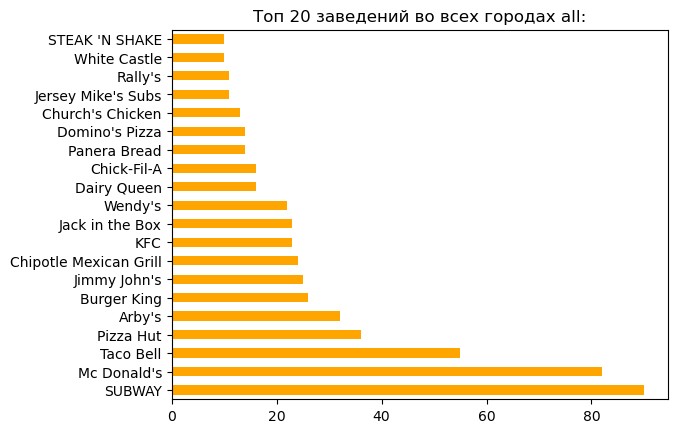

In [18]:
city_top(df)

### Выведем график анализируемых городов по кол-ву заведений

Number of unique cities: 8


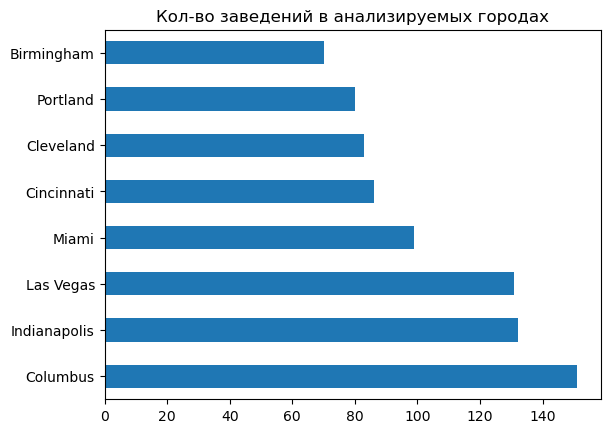

In [19]:
print("Number of unique cities:", df['city'].nunique())
title = 'Кол-во заведений в анализируемых городах'
nameplot = df['city'].value_counts()[:16].plot.barh(title=title)
# fig = nameplot.get_figure()
# fig.savefig('./plots/' + title + '.jpg', bbox_inches='tight', format='jpg', dpi=400)

In [20]:
df.city.value_counts()

Columbus        151
Indianapolis    132
Las Vegas       131
Miami            99
Cincinnati       86
Cleveland        83
Portland         80
Birmingham       70
Name: city, dtype: int64

### Выведем графики популярных заведений в каждом анализируемом городе
Columbus; 
Cincinnati;
Cleveland; 
Las Vegas; 
Miami;
Indianapolis;
Birmingham;
Portland.

Введите название города: Columbus
Number of unique restaurant: 57


<AxesSubplot:title={'center':'Топ 20 заведений во всех городах Columbus:'}>

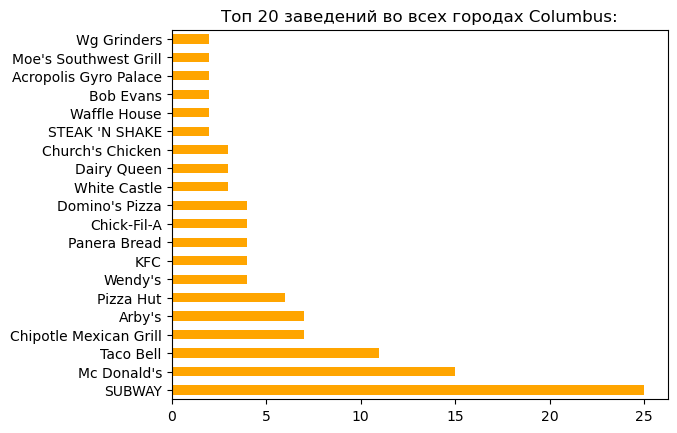

In [21]:
city = input('Введите название города: ')
city_top(df, city)

In [22]:
def city_map(df_db, city):
    if city in city_centers:
        city_center = city_centers[city]
    else:
        print("Указанного города нет в списке")
        return
        
    city_ff = df_db.query('city == @city')   
    m = folium.Map(location=city_center, zoom_start=12)   
    mc = MarkerCluster(name='Restaurants').add_to(m)
        
    all_markers = []
    for lat, lng in zip(city_ff['latitude'], city_ff['longitude']):
        cM = folium.Marker(location = (lat, lng)).add_to(mc)

    return m

In [23]:
city = input('Введите название города: ')
city_map(df, city)

Введите название города: Columbus


In [24]:
lats = df['latitude'].tolist()
lons = df['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=5)
plugins.FastMarkerCluster(data=locations).add_to(map1)
map1

### Смотрим кол-во открытых заведений в период времени

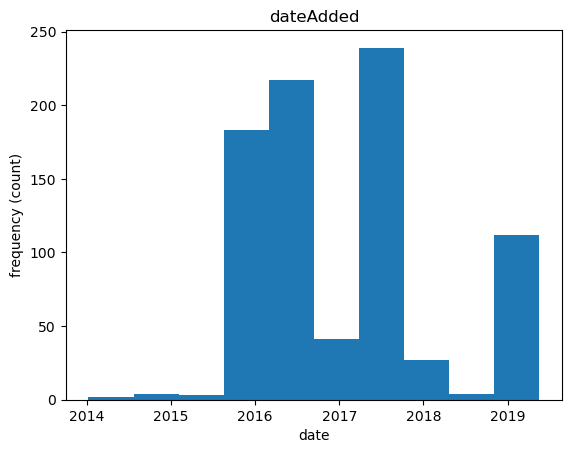

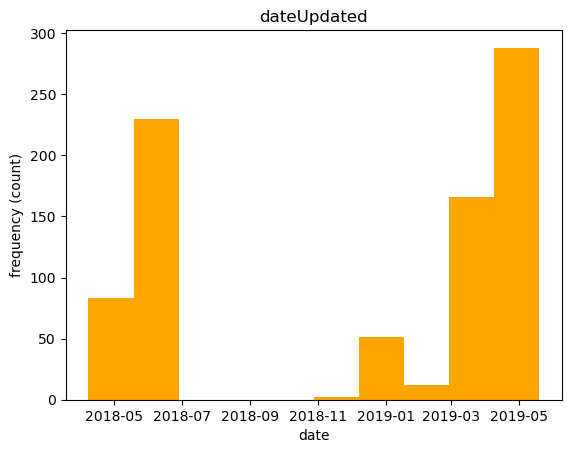

In [25]:
plt.hist(df['dateAdded'])
plt.xlabel("date")
plt.ylabel("frequency (count)")
plt.title("dateAdded")
plt.show()

plt.hist(df['dateUpdated'], color="orange")
plt.xlabel("date")
plt.ylabel("frequency (count)")
plt.title("dateUpdated")
plt.show()

### Смотрим кол-во сетевых заведений открытых в городах

In [26]:
rest_count_by_city = df['name'].value_counts()
rest_count_by_city.describe()

count    182.000000
mean       4.571429
std       11.068489
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       90.000000
Name: name, dtype: float64

In [27]:
print(len(rest_count_by_city[rest_count_by_city < 4]), "менее 4 заведений на город")
print("Всего", round(100*len(rest_count_by_city[rest_count_by_city < 4])/len(rest_count_by_city),2), "%")

144 менее 4 заведений на город
Всего 79.12 %


In [28]:
df_dummies = pd.concat([df, pd.get_dummies(df.city)], axis = 1)
df_pivot = df_dummies.pivot_table(['Birmingham','Cincinnati', 'Cleveland', 'Columbus', 'Indianapolis', 'Las Vegas', 'Miami','Portland'],['name'],aggfunc='sum')
city = input() 
df_city = df_dummies.pivot_table([city],['name'],aggfunc='sum') 
df_city[df_city[city] != 0].describe()

Columbus


,Columbus
count,57.000000
mean,2.649123
std,3.961832
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,25.000000


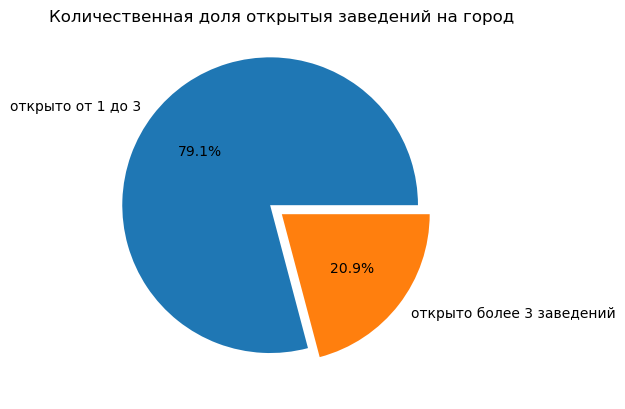

In [29]:
fig, ax = plt.subplots()
total_ff_less_than_4_rests = len(rest_count_by_city[rest_count_by_city < 4])
total_ff_greater_equal_4_rests = df['name'].nunique() - total_ff_less_than_4_rests
values = [total_ff_less_than_4_rests, total_ff_greater_equal_4_rests]
ax.pie(values, 
       labels=["открыто от 1 до 3", "открыто более 3 заведений"], autopct='%.1f%%', radius=1, 
       explode = (0.1, 0))
ax.set_aspect('equal')
ax.set_title("Количественная доля открытыя заведений на город")
plt.show()

In [30]:
top8_fastfood_populated_cities = df['city'].value_counts()[:8].index.tolist()
top8_fastfood_populated_cities[:8]

['Columbus',
 'Indianapolis',
 'Las Vegas',
 'Miami',
 'Cincinnati',
 'Cleveland',
 'Portland',
 'Birmingham']

In [31]:
def get_restaurants_counts(city_name):
    return df[df["city"]==city_name]["names"].value_counts()

def print_more_than_3_shop_rest(restaurants, city_name):
    more_than_3_shops = restaurants[restaurants > 3]
    print("\nВсего", len(restaurants), "уникальных заведений в ", city_name+",")
    print(len(more_than_3_shops), "бренд(ов) открывшие более 3 заведений")
    print("Это", str(round(len(more_than_3_shops)/sum(restaurants)*100,2))+"% от общего числа заведений")
    print(more_than_3_shops)

In [32]:
for city in top8_fastfood_populated_cities:
    print_more_than_3_shop_rest(get_restaurants_counts(city), city)


Всего 57 уникальных заведений в  Columbus,
11 бренд(ов) открывшие более 3 заведений
Это 7.28% от общего числа заведений
SUBWAY                    25
Mc Donald's               15
Taco Bell                 11
Chipotle Mexican Grill     7
Arby's                     7
Pizza Hut                  6
Wendy's                    4
KFC                        4
Panera Bread               4
Chick-Fil-A                4
Domino's Pizza             4
Name: names, dtype: int64

Всего 53 уникальных заведений в  Indianapolis,
10 бренд(ов) открывшие более 3 заведений
Это 7.58% от общего числа заведений
SUBWAY              11
Arby's               9
Taco Bell            9
Pizza Hut            8
Dairy Queen          7
STEAK 'N SHAKE       6
White Castle         5
Jimmy John's         5
Fazoli's             4
Church's Chicken     4
Name: names, dtype: int64

Всего 37 уникальных заведений в  Las Vegas,
11 бренд(ов) открывшие более 3 заведений
Это 8.4% от общего числа заведений
Mc Donald's        21
Jack in th

['SUBWAY', "Mc Donald's", 'Taco Bell'] are the top 3 populated restaurants in Columbus


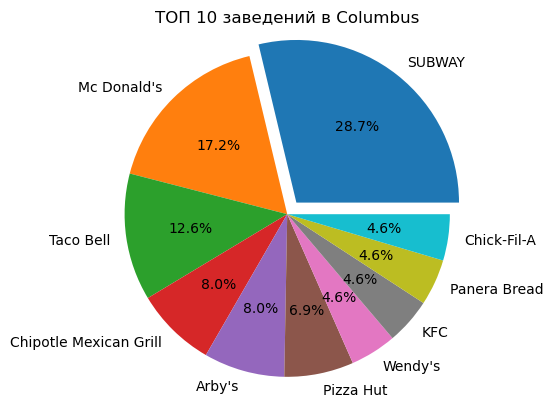

['SUBWAY', "Arby's", 'Taco Bell'] are the top 3 populated restaurants in Indianapolis


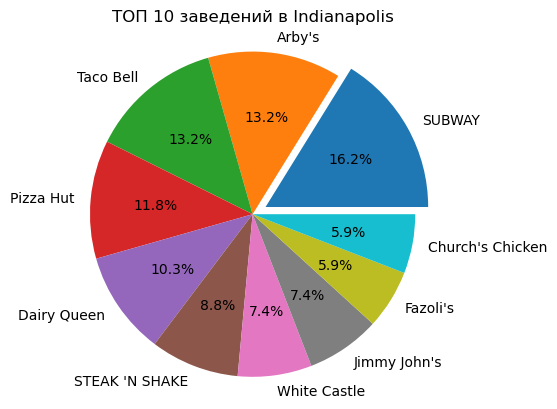

["Mc Donald's", 'Jack in the Box', 'Taco Bell'] are the top 3 populated restaurants in Las Vegas


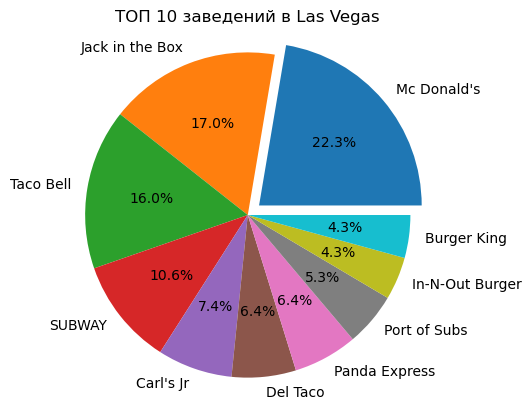

["Mc Donald's", 'Taco Bell', 'Burger King'] are the top 3 populated restaurants in Miami


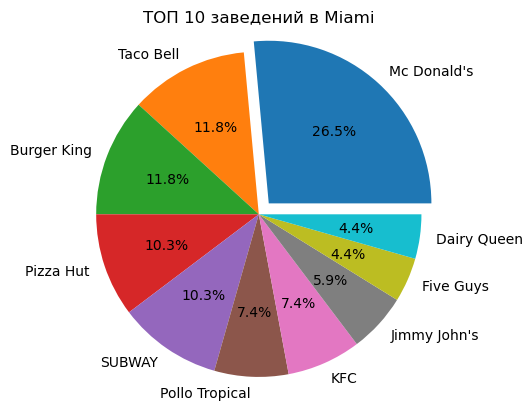

['SUBWAY', 'Panera Bread', 'Chipotle Mexican Grill'] are the top 3 populated restaurants in Cincinnati


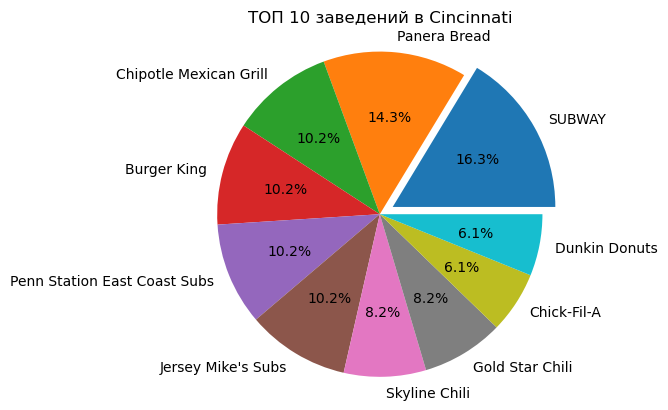

['SUBWAY', "Rally's", "Mc Donald's"] are the top 3 populated restaurants in Cleveland


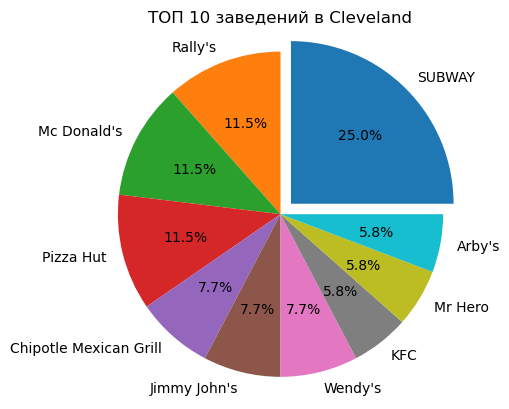

["Mc Donald's", 'SUBWAY', 'Taco Bell'] are the top 3 populated restaurants in Portland


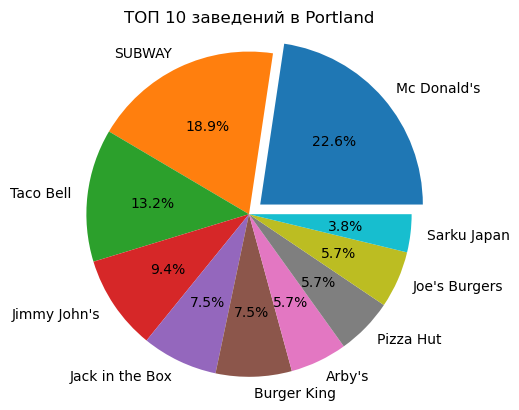

['Chick-Fil-A', 'SUBWAY', "Mc Donald's"] are the top 3 populated restaurants in Birmingham


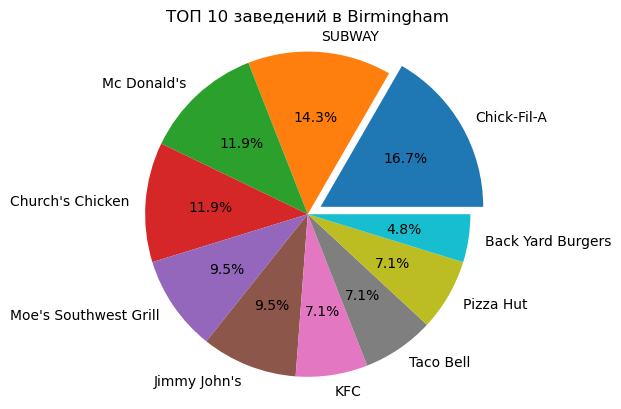

In [33]:
def create_pie_chart_data(city_name):
    counts =  df[df["city"]==city_name]["names"].value_counts()[:10].values
    labels = df[df["city"]==city_name]["names"].value_counts().index.tolist()[:10]
    return counts, labels

def plot_pie_chart(counts, labels, city_name):
    fig, ax = plt.subplots()
    ax.pie(counts, labels=labels, autopct='%.1f%%', radius=1.1, 
          explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0))
    ax.set_aspect('equal')
    ax.set_title("ТОП 10 заведений в " + city_name)
    plt.show()

for city in top8_fastfood_populated_cities:
    counts, labels = create_pie_chart_data(city)
    print(labels[:3], "are the top 3 populated restaurants in", city)
    plot_pie_chart(counts, labels, city)

In [34]:
state_codes = df['province'].value_counts().index.tolist()
value_counts_by_states = df['province'].value_counts()

data= [dict(type='choropleth',
            locations = state_codes, 
            z = value_counts_by_states,
            locationmode = 'USA-states',
            colorscale = 'Reds',
            marker_line_color = 'white',
            colorbar_title = "Количество ресторанов быстрого питания"
        )]
layout = dict(title = 'Рестораные быстрого питания в США 2019', 
              geo = dict(scope='usa'))
iplot(dict(data=data, layout=layout))

In [35]:
#df.to_csv(r'C:\Users\Rustam\Downloads\final_df.csv', index= False)

In [36]:
df_for_modelling = df.copy()

#подготовка датафремов для моделирования

#Преобразуем данные dateAdded в дату (без времени) для дальнейшей группировки
df_for_modelling['date_add'] = pd.to_datetime(df_for_modelling["dateAdded"], format="%Y/%m/%d")
df_for_modelling['date_add'] = pd.to_datetime(df_for_modelling['date_add']).dt.date

#с помощью метода pandas.get_dummies преобразуем данные по городам
df_for_modelling = pd.concat([df_for_modelling, pd.get_dummies(df_for_modelling.city)], axis = 1)

#сортируем значения по дате для корректного расчета накопительного кол-ва ресторанов при группировке по дате
df_for_modelling=df_for_modelling.sort_values(by=['date_add'],ascending=True)

#для каждого города формиурем тренировочную модель для прогнозирования с учетом требований метода и обучаем модель
#период прогнозирования принимаем за разницу дней от последней даты добавления ресторана в городе до конца года

#Birmingham
df_Birmingham_train = df_for_modelling.groupby (df_for_modelling.date_add )['Birmingham'].sum ()
df_Birmingham_train=df_Birmingham_train.cumsum(axis=0)
df_Birmingham_train = df_Birmingham_train.reset_index()
df_Birmingham_train = df_Birmingham_train.rename(columns={"date_add":"ds", "Birmingham":"y"})
model_Birmingham = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Birmingham.fit(df_Birmingham_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Birmingham_start_date=pd.to_datetime(df_Birmingham_train['ds'].max(),format="%Y-%m-%d")
Birmingham_delta=(end_date-Birmingham_start_date).days

Birmingham_predict_period = model_Birmingham.make_future_dataframe(periods=Birmingham_delta)
Birmingham_predict_period = Birmingham_predict_period[-Birmingham_delta:]

forecast_Birmingham = model_Birmingham.predict(Birmingham_predict_period)

#Cincinnati
df_Cincinnati_train = df_for_modelling.groupby (df_for_modelling.date_add )['Cincinnati'].sum ()
df_Cincinnati_train = df_Cincinnati_train.cumsum(axis=0)
df_Cincinnati_train = df_Cincinnati_train.reset_index()
df_Cincinnati_train = df_Cincinnati_train.rename(columns={"date_add":"ds", "Cincinnati":"y"})
model_Cincinnati = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Cincinnati.fit(df_Cincinnati_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Cincinnati_start_date=pd.to_datetime(df_Cincinnati_train['ds'].max(),format="%Y-%m-%d")
Cincinnati_delta=(end_date-Cincinnati_start_date).days

Cincinnati_predict_period = model_Cincinnati.make_future_dataframe(periods=Cincinnati_delta)
Cincinnati_predict_period = Cincinnati_predict_period[-Cincinnati_delta:]

forecast_Cincinnati = model_Cincinnati.predict(Cincinnati_predict_period)

#Cleveland
df_Cleveland_train = df_for_modelling.groupby (df_for_modelling.date_add )['Cleveland'].sum ()
df_Cleveland_train=df_Cleveland_train.cumsum(axis=0)
df_Cleveland_train = df_Cleveland_train.reset_index()
df_Cleveland_train = df_Cleveland_train.rename(columns={"date_add":"ds", "Cleveland":"y"})
model_Cleveland = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Cleveland.fit(df_Cleveland_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Cleveland_start_date=pd.to_datetime(df_Cleveland_train['ds'].max(),format="%Y-%m-%d")
Cleveland_delta=(end_date-Cleveland_start_date).days

Cleveland_predict_period = model_Cleveland.make_future_dataframe(periods=Cleveland_delta)
Cleveland_predict_period = Cleveland_predict_period[-Cleveland_delta:]

forecast_Cleveland = model_Cleveland.predict(Cleveland_predict_period)

#Columbus
df_Columbus_train = df_for_modelling.groupby (df_for_modelling.date_add )['Columbus'].sum ()
df_Columbus_train=df_Columbus_train.cumsum(axis=0)
df_Columbus_train = df_Columbus_train.reset_index()
df_Columbus_train = df_Columbus_train.rename(columns={"date_add":"ds", "Columbus":"y"})
model_Columbus = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Columbus.fit(df_Columbus_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Columbus_start_date=pd.to_datetime(df_Columbus_train['ds'].max(),format="%Y-%m-%d")
Columbus_delta=(end_date-Columbus_start_date).days

Columbus_predict_period = model_Columbus.make_future_dataframe(periods=Columbus_delta)
Columbus_predict_period = Columbus_predict_period[-Columbus_delta:]

forecast_Columbus = model_Columbus.predict(Columbus_predict_period)

#Indianapolis
df_Indianapolis_train = df_for_modelling.groupby (df_for_modelling.date_add )['Indianapolis'].sum ()
df_Indianapolis_train=df_Indianapolis_train.cumsum(axis=0)
df_Indianapolis_train = df_Indianapolis_train.reset_index()
df_Indianapolis_train = df_Indianapolis_train.rename(columns={"date_add":"ds", "Indianapolis":"y"})
model_Indianapolis = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Indianapolis.fit(df_Indianapolis_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Indianapolis_start_date=pd.to_datetime(df_Indianapolis_train['ds'].max(),format="%Y-%m-%d")
Indianapolis_delta=(end_date-Indianapolis_start_date).days

Indianapolis_predict_period = model_Indianapolis.make_future_dataframe(periods=Indianapolis_delta)
Indianapolis_predict_period = Indianapolis_predict_period[-Indianapolis_delta:]

forecast_Indianapolis = model_Indianapolis.predict(Indianapolis_predict_period)

#Las_Vegas
df_Las_Vegas_train = df_for_modelling.groupby (df_for_modelling.date_add )['Las Vegas'].sum ()
df_Las_Vegas_train=df_Las_Vegas_train.cumsum(axis=0)
df_Las_Vegas_train = df_Las_Vegas_train.reset_index()
df_Las_Vegas_train = df_Las_Vegas_train.rename(columns={"date_add":"ds", "Las Vegas":"y"})
model_Las_Vegas = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Las_Vegas.fit(df_Las_Vegas_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Las_Vegas_start_date=pd.to_datetime(df_Las_Vegas_train['ds'].max(),format="%Y-%m-%d")
Las_Vegas_delta=(end_date-Las_Vegas_start_date).days

Las_Vegas_predict_period = model_Las_Vegas.make_future_dataframe(periods=Las_Vegas_delta)
Las_Vegas_predict_period = Las_Vegas_predict_period[-Las_Vegas_delta:]

forecast_Las_Vegas = model_Las_Vegas.predict(Las_Vegas_predict_period)

#Miami
df_Miami_train = df_for_modelling.groupby (df_for_modelling.date_add )['Miami'].sum ()
df_Miami_train=df_Miami_train.cumsum(axis=0)
df_Miami_train = df_Miami_train.reset_index()
df_Miami_train = df_Miami_train.rename(columns={"date_add":"ds", "Miami":"y"})
model_Miami = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Miami.fit(df_Miami_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Miami_start_date=pd.to_datetime(df_Miami_train['ds'].max(),format="%Y-%m-%d")
Miami_delta=(end_date-Miami_start_date).days

Miami_predict_period = model_Miami.make_future_dataframe(periods=Miami_delta)
Miami_predict_period = Miami_predict_period[-Miami_delta:]

forecast_Miami = model_Miami.predict(Miami_predict_period)

#Portland
df_Portland_train = df_for_modelling.groupby (df_for_modelling.date_add )['Portland'].sum ()
df_Portland_train=df_Portland_train.cumsum(axis=0)
df_Portland_train = df_Portland_train.reset_index()
df_Portland_train = df_Portland_train.rename(columns={"date_add":"ds", "Portland":"y"})
model_Portland = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)
model_Portland.fit(df_Portland_train)

end_date=pd.to_datetime('2019-12-31',format="%Y-%m-%d")
Portland_start_date=pd.to_datetime(df_Portland_train['ds'].max(),format="%Y-%m-%d")
Portland_delta=(end_date-Portland_start_date).days

Portland_predict_period = model_Portland.make_future_dataframe(periods=Portland_delta)
Portland_predict_period = Portland_predict_period[-Portland_delta:]

forecast_Portland = model_Portland.predict(Portland_predict_period)

14:15:51 - cmdstanpy - INFO - Chain [1] start processing
14:15:51 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:52 - cmdstanpy - INFO - Chain [1] done processing
14:15:52 - cmdstanpy - INFO - Chain [1] start processing
14:15:53 - cmdstanpy - INFO - Chain [1] done processing
14:15:53 - cmdstanpy - INFO - Chain [1] start processing
14:15:53 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
Birmingham_end_2019 = forecast_Birmingham [forecast_Birmingham['ds']==forecast_Birmingham['ds'].max()]  ['yhat'].sum()
Birmingham_start = df_Birmingham_train [df_Birmingham_train['ds']==df_Birmingham_train['ds'].max()]  ['y'].sum()
Birmingham_growth= Birmingham_end_2019 - Birmingham_start

Cincinnati_end_2019 = forecast_Cincinnati [forecast_Cincinnati['ds']==forecast_Cincinnati['ds'].max()]  ['yhat'].sum()
Cincinnati_start = df_Cincinnati_train [df_Cincinnati_train['ds']==df_Cincinnati_train['ds'].max()]  ['y'].sum()
Cincinnati_growth= Cincinnati_end_2019 - Cincinnati_start

Cleveland_end_2019 = forecast_Cleveland [forecast_Cleveland['ds']==forecast_Cleveland['ds'].max()]  ['yhat'].sum()
Cleveland_start = df_Cleveland_train [df_Cleveland_train['ds']==df_Cleveland_train['ds'].max()]  ['y'].sum()
Cleveland_growth= Cleveland_end_2019 - Cleveland_start

Columbus_end_2019 = forecast_Columbus [forecast_Columbus['ds']==forecast_Columbus['ds'].max()]  ['yhat'].sum()
Columbus_start = df_Columbus_train [df_Columbus_train['ds']==df_Columbus_train['ds'].max()]  ['y'].sum()
Columbus_growth= Columbus_end_2019 - Columbus_start

Indianapolis_end_2019 = forecast_Indianapolis [forecast_Indianapolis['ds']==forecast_Indianapolis['ds'].max()]  ['yhat'].sum()
Indianapolis_start = df_Indianapolis_train [df_Indianapolis_train['ds']==df_Indianapolis_train['ds'].max()]  ['y'].sum()
Indianapolis_growth= Indianapolis_end_2019 - Indianapolis_start

Las_Vegas_end_2019 = forecast_Las_Vegas [forecast_Portland['ds']==forecast_Las_Vegas['ds'].max()]  ['yhat'].sum()
Las_Vegas_start = df_Las_Vegas_train [df_Las_Vegas_train['ds']==df_Las_Vegas_train['ds'].max()]  ['y'].sum()
Las_Vegas_growth= Las_Vegas_end_2019 - Las_Vegas_start

Miami_end_2019 = forecast_Miami [forecast_Miami['ds']==forecast_Miami['ds'].max()]  ['yhat'].sum()
Miami_start = df_Miami_train [df_Miami_train['ds']==df_Miami_train['ds'].max()]  ['y'].sum()
Miami_growth= Miami_end_2019 - Miami_start

Portland_end_2019 = forecast_Portland [forecast_Portland['ds']==forecast_Portland['ds'].max()]  ['yhat'].sum()
Portland_start = df_Portland_train [df_Portland_train['ds']==df_Portland_train['ds'].max()]  ['y'].sum()
Portland_growth= Portland_end_2019 - Portland_start
print('Birmingham_end_2019:',Birmingham_end_2019)
print('Birmingham_start:',Birmingham_start)
print('Birmingham_growth:',Birmingham_growth)

print('Cincinnati_end_2019:',Cincinnati_end_2019)
print('Cincinnati_start:',Cincinnati_start)
print('Cincinnati_growth:',Cincinnati_growth)

print('Cleveland_end_2019:',Cleveland_end_2019)
print('Cleveland_start:',Cleveland_start)
print('Cleveland_growth:',Cleveland_growth)

print('Columbus_end_2019:',Columbus_end_2019)
print('Columbus_start:',Columbus_start)
print('Columbus_growth:',Columbus_growth)

print('Indianapolis_end_2019:',Indianapolis_end_2019)
print('Indianapolis_start:',Indianapolis_start)
print('Indianapolis_growth:',Indianapolis_growth)

print('Las_Vegas_end_2019:',Las_Vegas_end_2019)
print('Las_Vegas_start:',Las_Vegas_start )
print('Las_Vegas_growth:',Las_Vegas_growth)

print('Miami_end_2019:',Miami_end_2019)
print('Miami_start:',Miami_start )
print('Miami_growth:',Miami_growth)

print('Portland_end_2019:',Portland_end_2019)
print('Portland_start:',Portland_start)
print('Portland_growth:',Portland_growth)

Birmingham_end_2019: 68.27616870398141
Birmingham_start: 70
Birmingham_growth: -1.723831296018588
Cincinnati_end_2019: 92.48366811779204
Cincinnati_start: 86
Cincinnati_growth: 6.4836681177920354
Cleveland_end_2019: 82.09418612291125
Cleveland_start: 83
Cleveland_growth: -0.9058138770887467
Columbus_end_2019: 153.663071548075
Columbus_start: 151
Columbus_growth: 2.66307154807501
Indianapolis_end_2019: 134.4823677276887
Indianapolis_start: 132
Indianapolis_growth: 2.482367727688711
Las_Vegas_end_2019: 109.3308127950976
Las_Vegas_start: 131
Las_Vegas_growth: -21.6691872049024
Miami_end_2019: 100.97228616158245
Miami_start: 99
Miami_growth: 1.9722861615824456
Portland_end_2019: 80.27006973435947
Portland_start: 80
Portland_growth: 0.2700697343594669


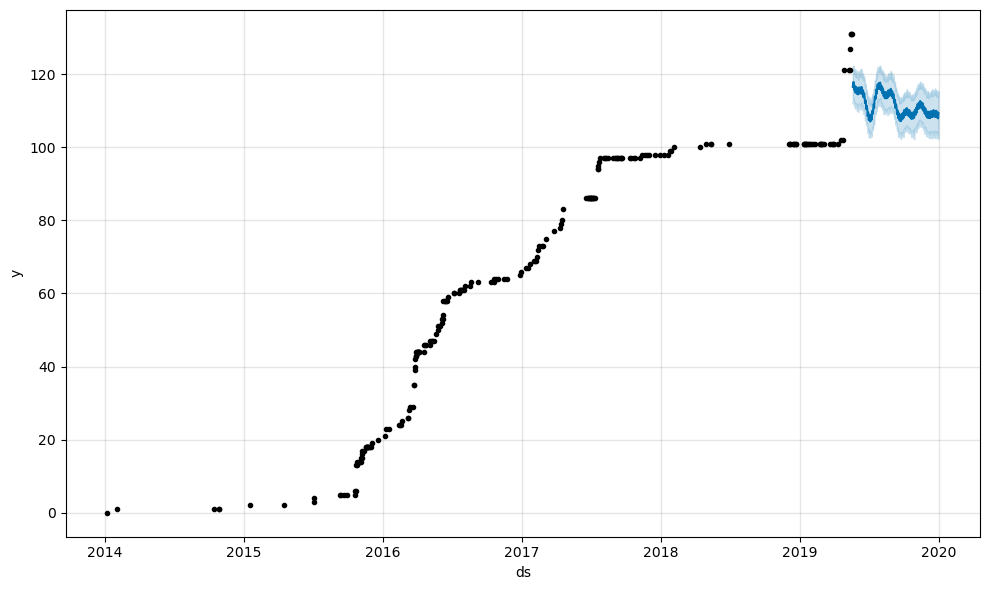

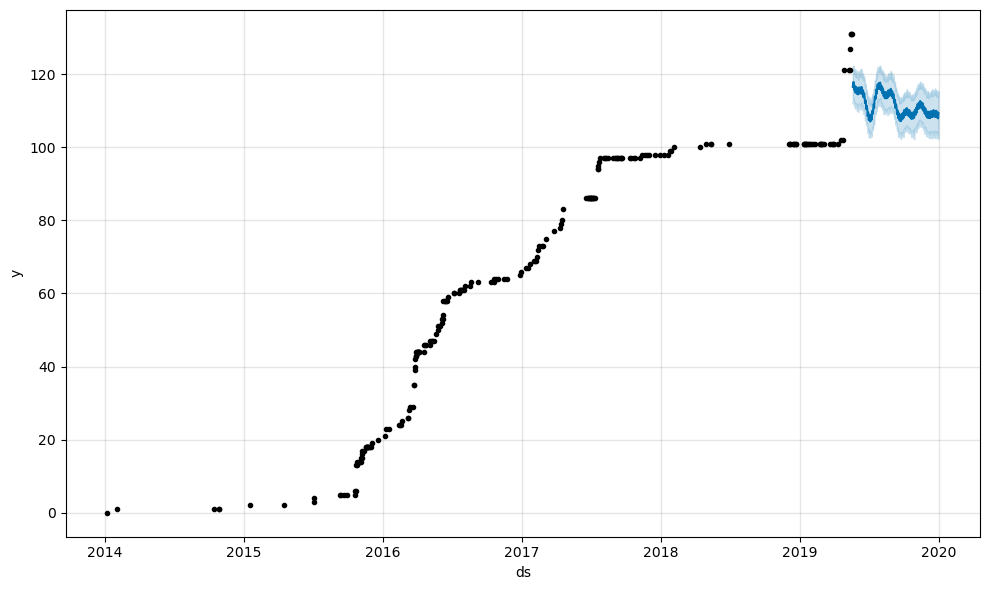

In [38]:
model_Las_Vegas.plot(forecast_Las_Vegas)

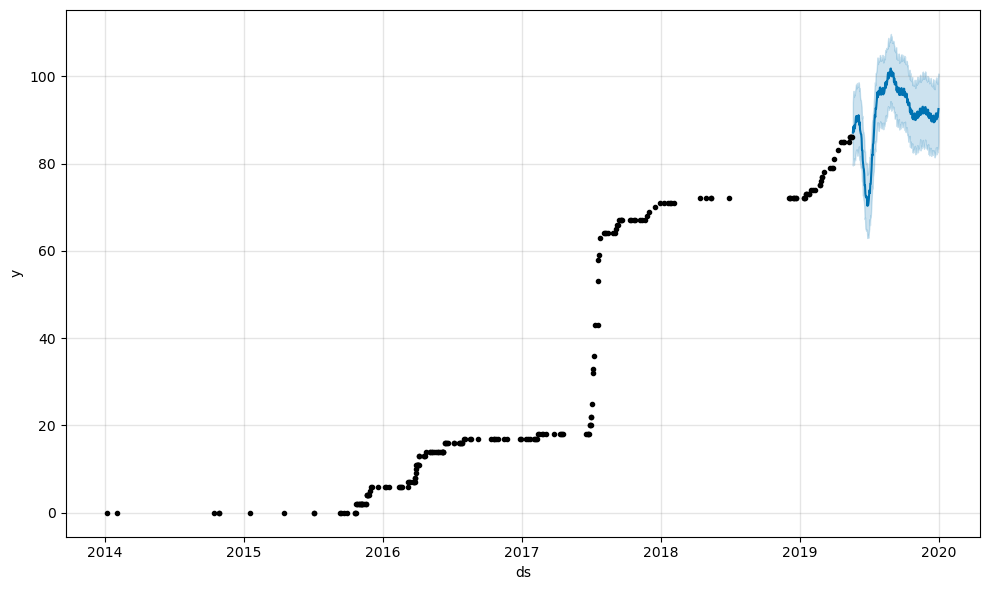

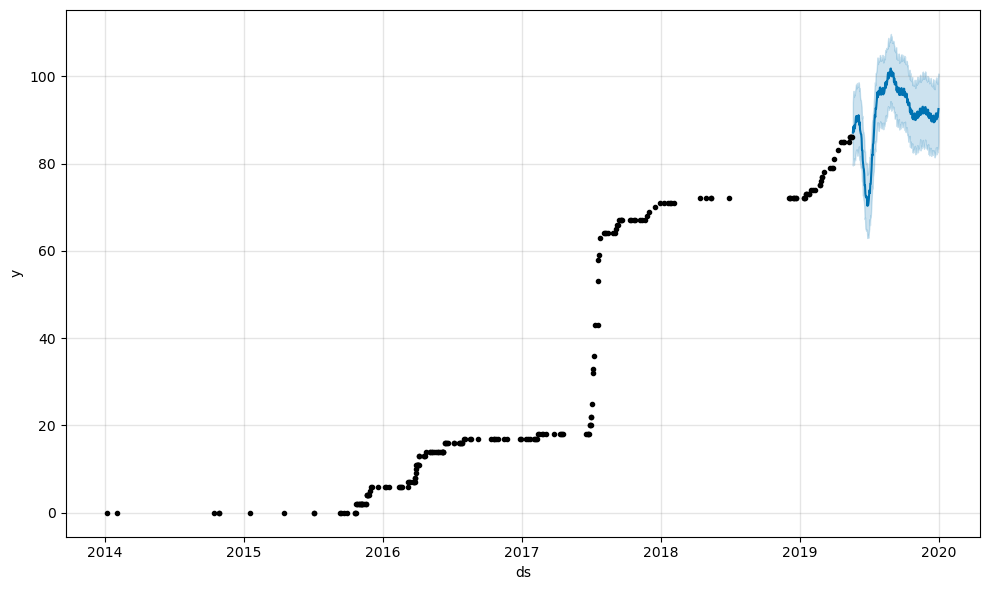

In [39]:
model_Cincinnati.plot(forecast_Cincinnati)

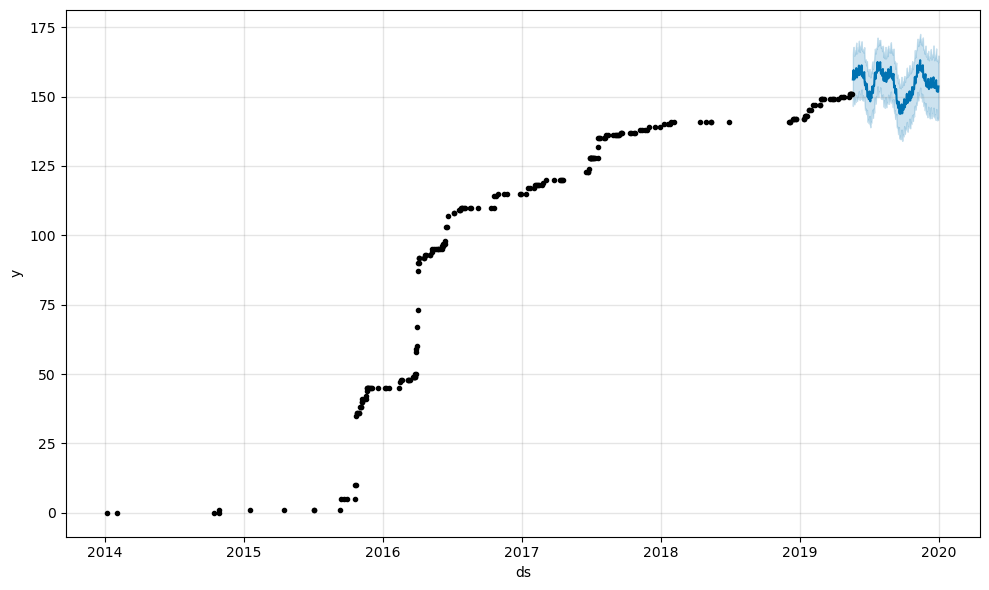

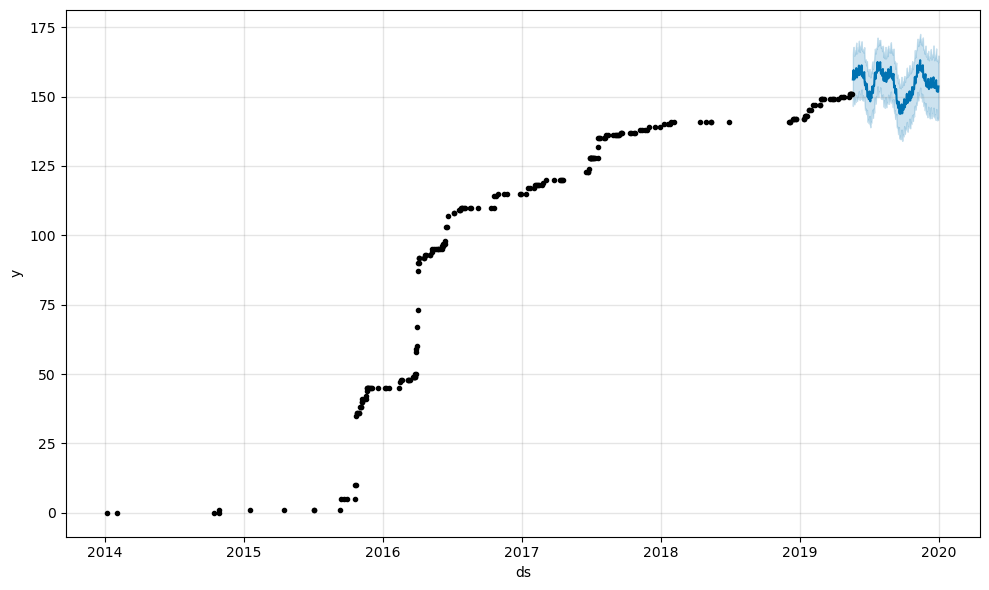

In [40]:
model_Columbus.plot(forecast_Columbus)